In [64]:
import pandas as pd
import codecs
from gensim.models import KeyedVectors
from gensim.models.fasttext import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as pyplot

%matplotlib inline

In [13]:
corpus = []
with codecs.open("Data/persian_poet.txt", "r", "utf-8") as text:
    for sentence in text:
        word_list = [word for word in sentence.split()]
        corpus.append(word_list)

### the range of hyperparameters I want to optimize, such as:

+ embedding_size
+ window_size
+ min_word (minimum count of words)
+ down_sampling (subsampling rate)

### We can use a library like Optuna or Scikit-Optimize for Bayesian Optimization, or RandomizedSearchCV from Scikit-Learn for Random Search.

## Definition for each parameter in the FastText model:

+ sentences: The corpus of tokenized sentences used for training the model.
+ vector_size: The dimensionality of the word vectors (embedding size).
+ window: The maximum distance between the target word and context words.
+ min_count: Ignores words with a total frequency lower than this threshold.
+ sample: The threshold for subsampling high-frequency words to reduce their influence.
+ sg: Defines the training algorithm: 1 for Skip-gram, 0 for CBOW (Continuous Bag of Words).
+ epochs: The number of training epochs over the corpus.
+ min_n: The minimum length of character n-grams to include.
+ max_n: The maximum length of character n-grams to include.
  
If these parameters min_n and max_n are not set (default is min_n=0 and max_n=0), FastText will not use subword information.

## Why Use n-grams?
Handles rare words: By breaking words into character n-grams, FastText can create embeddings for words not seen in training by combining the embeddings of their n-grams.
Better for morphologically rich languages: For languages like Persian, where words have many forms due to prefixes, suffixes, or infixes, n-grams improve generalization.

# Bayesian Optimization Implementation using Optuna 

In [9]:
import optuna
from gensim.models import FastText

# Define the optimization objective
def objective(trial):
    # Suggest hyperparameters
    embedding_size = trial.suggest_int("embedding_size", 50, 400, step=50)
    window_size = trial.suggest_int("window_size", 2, 20)
    min_word = trial.suggest_int("min_word", 1, 10)
    down_sampling = trial.suggest_loguniform("down_sampling", 1e-5, 1e-2)
    epoch = trial.suggest_int("epoch", 5, 200)
    min_n = trial.suggest_int("min_n", 1, 3)  # Minimum n-gram length
    max_n = trial.suggest_int("max_n", 4, 6)  # Maximum n-gram length
    
    # Train FastText model
    model = FastText(
        sentences=corpus,
        vector_size=embedding_size,  
        window=window_size,
        min_count=min_word,
        sample=down_sampling,
        sg=1,  # Skip-gram
        epochs=epoch,  
        min_n=min_n,
        max_n=max_n
    )
    
    # Evaluate the loss
    loss = model.get_latest_training_loss()
    
    # Return the loss (lower is better)
    return loss

# Run the optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Output the best hyperparameters
print("Best parameters:", study.best_params)

[I 2024-11-24 02:10:44,168] A new study created in memory with name: no-name-a4692856-4b36-47ca-8d14-304dcd2906e4
/tmp/ipykernel_90/1470411511.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  down_sampling = trial.suggest_loguniform("down_sampling", 1e-5, 1e-2)
[I 2024-11-24 02:14:46,170] Trial 0 finished with value: 0.0 and parameters: {'embedding_size': 400, 'window_size': 5, 'min_word': 4, 'down_sampling': 0.000854475062995919, 'epoch': 55, 'min_n': 3, 'max_n': 5}. Best is trial 0 with value: 0.0.
[I 2024-11-24 02:24:15,162] Trial 1 finished with value: 0.0 and parameters: {'embedding_size': 350, 'window_size': 18, 'min_word': 2, 'down_sampling': 6.786709847866521e-05, 'epoch': 150, 'min_n': 3, 'max_n': 5}. Best is trial 0 with value: 0.0.
[I 2024-11-24 02:24:35,901] Trial 2 finished with value: 0.0 and parameters: {'emb

Best parameters: {'embedding_size': 400, 'window_size': 5, 'min_word': 4, 'down_sampling': 0.000854475062995919, 'epoch': 55, 'min_n': 3, 'max_n': 5}


Epoch 1: Loss = 0.0
Epoch 2: Loss = 0.0
Epoch 3: Loss = 0.0
Epoch 4: Loss = 0.0
Epoch 5: Loss = 0.0
Epoch 6: Loss = 0.0
Epoch 7: Loss = 0.0
Epoch 8: Loss = 0.0
Epoch 9: Loss = 0.0
Epoch 10: Loss = 0.0
Epoch 11: Loss = 0.0
Epoch 12: Loss = 0.0
Epoch 13: Loss = 0.0
Epoch 14: Loss = 0.0
Epoch 15: Loss = 0.0
Epoch 16: Loss = 0.0
Epoch 17: Loss = 0.0
Epoch 18: Loss = 0.0
Epoch 19: Loss = 0.0
Epoch 20: Loss = 0.0
Epoch 21: Loss = 0.0
Epoch 22: Loss = 0.0
Epoch 23: Loss = 0.0
Epoch 24: Loss = 0.0
Epoch 25: Loss = 0.0
Epoch 26: Loss = 0.0
Epoch 27: Loss = 0.0
Epoch 28: Loss = 0.0
Epoch 29: Loss = 0.0
Epoch 30: Loss = 0.0
Epoch 31: Loss = 0.0
Epoch 32: Loss = 0.0
Epoch 33: Loss = 0.0
Epoch 34: Loss = 0.0
Epoch 35: Loss = 0.0
Epoch 36: Loss = 0.0
Epoch 37: Loss = 0.0
Epoch 38: Loss = 0.0
Epoch 39: Loss = 0.0
Epoch 40: Loss = 0.0
Epoch 41: Loss = 0.0
Epoch 42: Loss = 0.0
Epoch 43: Loss = 0.0
Epoch 44: Loss = 0.0
Epoch 45: Loss = 0.0
Epoch 46: Loss = 0.0
Epoch 47: Loss = 0.0
Epoch 48: Loss = 0.0
E

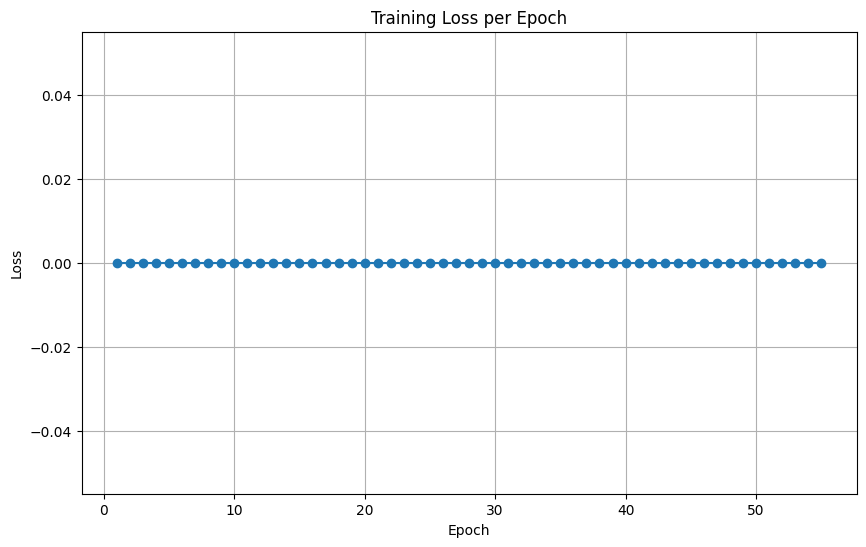

In [17]:
import matplotlib.pyplot as plt
from gensim.models import FastText
from gensim.models.callbacks import CallbackAny2Vec
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


# Callback to track training loss
class LossLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch_losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if len(self.epoch_losses) == 0:
            self.epoch_losses.append(loss)
        else:
            self.epoch_losses.append(loss - sum(self.epoch_losses))
        print(f"Epoch {len(self.epoch_losses)}: Loss = {self.epoch_losses[-1]}")

# Initialize the logger
loss_logger = LossLogger()

# Train the FastText model
model = FastText(
    sentences=corpus,
    vector_size=400,         
    window=5,
    min_count=4,              
    sample=10008,             
    sg=1,                    
    epochs=55,              
    min_n=3,
    max_n=5,
    workers=cores-1,              
    callbacks=[loss_logger]   # Attach the logger
)

# Print vocabulary size
print(f"Vocabulary size: {len(model.wv)}")

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_logger.epoch_losses) + 1), loss_logger.epoch_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [19]:
# Get all words in the model's vocabulary
words = list(model.wv.index_to_key)
print(f"Number of words in vocabulary: {len(words)}")
print(f"Sample words: {words[:10]}")  # Display the first 10 words

Number of words in vocabulary: 15256
Sample words: ['و', 'از', 'در', 'را', 'که', 'تو', 'به', 'آن', 'ز', 'ای']


In [20]:
model.wv['عشق']

array([-0.00873718, -0.11711009,  0.16928802,  0.0403502 ,  0.15391445,
       -0.17339662,  0.12608194, -0.06134896, -0.05604829, -0.05347502,
        0.02866505,  0.08215197, -0.1419307 ,  0.27911392, -0.12072653,
        0.0954131 ,  0.03110853, -0.1861004 ,  0.3112831 ,  0.03997695,
        0.3800342 ,  0.2629681 , -0.23852982,  0.11341234,  0.3125411 ,
        0.27661818,  0.37072614, -0.08905984, -0.07881799,  0.05005633,
       -0.06712464, -0.09892763, -0.07815544,  0.30778402,  0.03486362,
       -0.2002187 ,  0.10877474,  0.11427336,  0.04117144,  0.02730081,
       -0.14314695,  0.04663075,  0.34659263,  0.3163453 ,  0.03578437,
        0.33650848,  0.1291254 , -0.22860684, -0.0182317 ,  0.18573359,
       -0.04226857, -0.00486915, -0.15192033, -0.14258638, -0.01865232,
       -0.16431485,  0.2154239 , -0.03471423,  0.2414285 ,  0.06606675,
        0.13352646, -0.07306121,  0.15083349,  0.19056709, -0.09526635,
       -0.20480658, -0.16969027, -0.07962378,  0.06497431,  0.37

In [22]:
model.wv.similar_by_word("عشق")

[('ِعشق', 0.39207327365875244),
 ('عشقک', 0.3686537444591522),
 ('عشقه', 0.3590817451477051),
 ('عشقا', 0.3356413245201111),
 ('عشقها', 0.3316326141357422),
 ('عشقباز', 0.3277844786643982),
 ('عشقت', 0.3200809061527252),
 ('درديست', 0.28322434425354004),
 ('عشقبازی', 0.2804878056049347),
 ('عاشقان', 0.2776397168636322)]

In [25]:
model.wv.most_similar("یار")

[('یارک', 0.4198015630245209),
 ('یاریم', 0.4126818776130676),
 ('خیار', 0.4106776714324951),
 ('غار', 0.39545220136642456),
 ('یارکان', 0.3751136362552643),
 ('كامیار', 0.36480605602264404),
 ('عیار', 0.36246195435523987),
 ('یاریی', 0.3588501214981079),
 ('میار', 0.3413833975791931),
 ('یاری', 0.34021034836769104)]

In [49]:
model.wv.similarity(w1='راز', w2='سر به مهر')

0.21109696

In [103]:
result = model.wv.most_similar(positive=['مرد', 'عشق'], negative=['زن'], topn=1)
print(result)

[('عشقت', 0.23850491642951965)]


In [50]:
model.train([["راز", "جاودانگی"]], total_examples=1, epochs=1)

(1, 2)

In [51]:
model.save("Model/fasttext.model")

In [100]:
model = FastText.load("Model/fasttext.model")

In [59]:
from gensim.models import KeyedVectors

# Save the word vectors
model.wv.save("Model/fasttext.kv")

In [82]:
from gensim.models import KeyedVectors

# Load the word vectors
wv = KeyedVectors.load("Model/fasttext.kv", mmap='r')

In [83]:
# Get the list of words in the model
words = model.wv.index_to_key

# Get the matrix of word vectors
X = model.wv.vectors  # Each row represents a vector of one word.

# View the matrix shape
print(X.shape)  # (Number of words, vector size)

(15256, 400)


In [84]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [85]:
result

array([[ 0.12957305, -0.1932384 ],
       [-0.0121237 , -0.4446063 ],
       [-0.01842877, -0.43781486],
       ...,
       [-0.41464514, -0.57461214],
       [-0.16426395, -0.43146607],
       [ 1.8241627 ,  1.3409818 ]], dtype=float32)

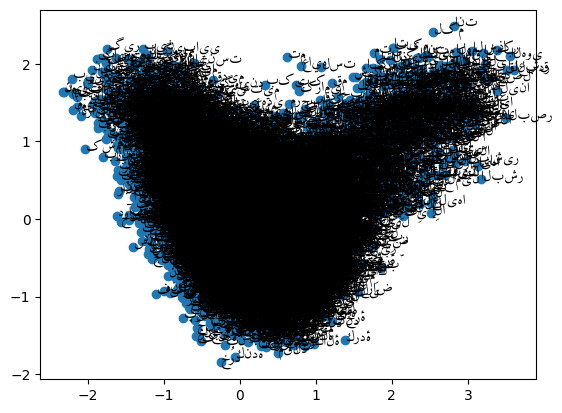

In [86]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Set the font path to the location of your Arabic-supporting font
font_path = 'Font/Amiri-Regular.ttf' 
font_prop = fm.FontProperties(fname=font_path)


plt.scatter(result[:, 0], result[:, 1])
words = list(words)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontproperties=font_prop)  # Use the font for annotations

plt.show()

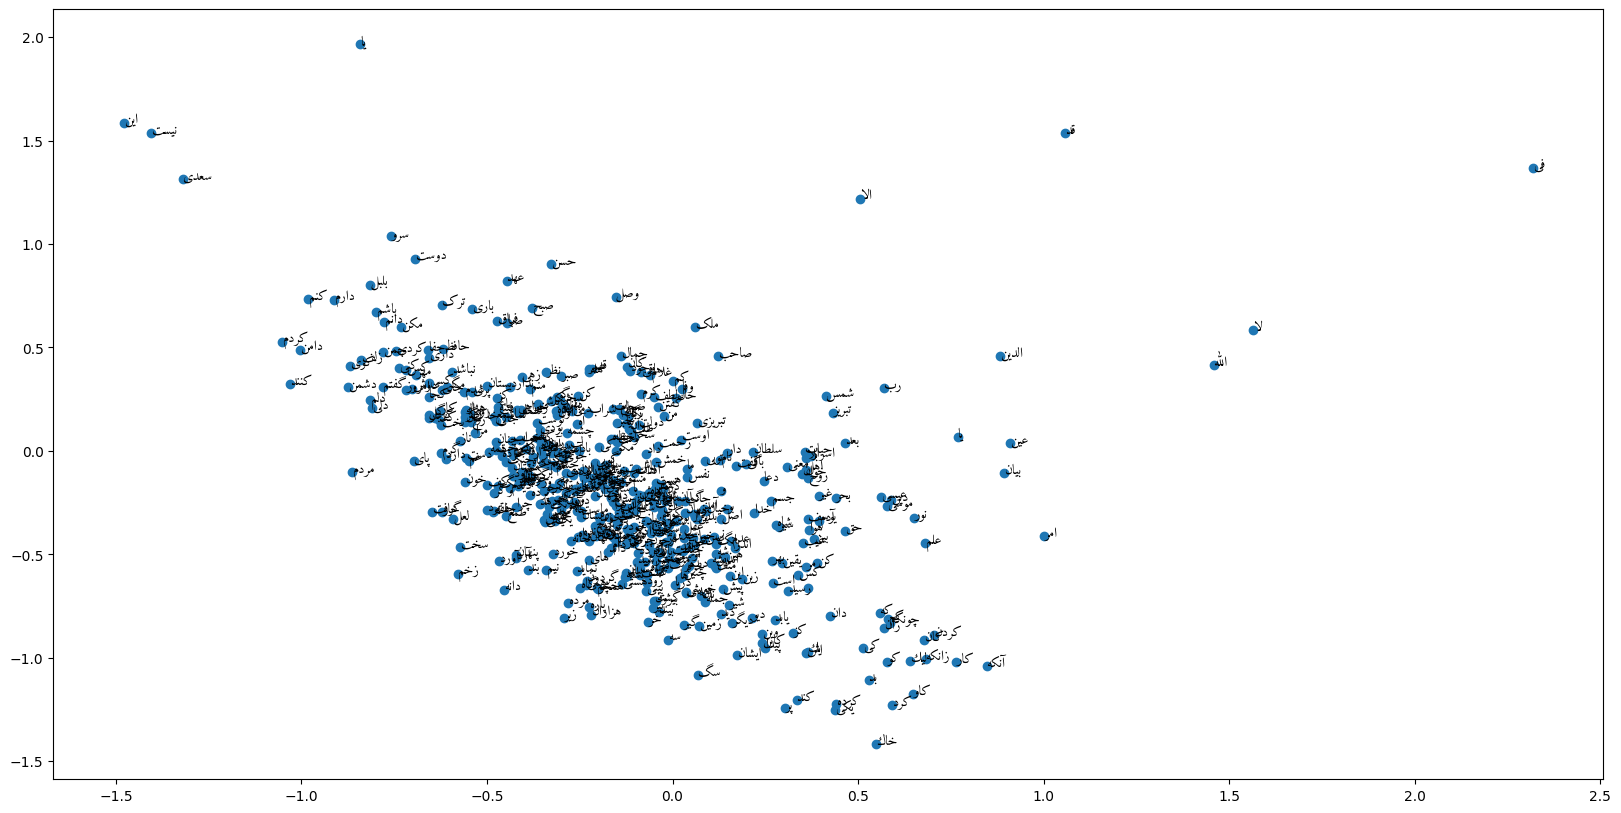

In [87]:
import arabic_reshaper
from bidi.algorithm import get_display

size = 500
plt.figure(figsize=(20, 10))
plt.scatter(result[:, 0][:size], result[:, 1][:size])
words = list(model.wv.index_to_key)
for i, word in enumerate(words[:size]):
    word = get_display(arabic_reshaper.reshape(word))
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontproperties=font_prop)  # Use the font for annotations

plt.show()

In [88]:
from gensim.models import KeyedVectors

# Load the FastText model in binary format
model = KeyedVectors.load_word2vec_format('Model/cc.fa.300.vec')

In [96]:
result = model.most_similar(positive=['زن', 'عشق'], negative=['یار'], topn=1)
print(result)

[('مرد', 0.4467819035053253)]


In [99]:
conda list --explicit > requirementsFastText.txt


Note: you may need to restart the kernel to use updated packages.
